In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
print("开始生成模拟网络流量数据...")

# 设置随机种子（保证结果可复现）
np.random.seed(42)

# 定义协议类型
protocols = ['HTTP', 'FTP', 'P2P', 'DNS', 'SMTP']
n_samples = 100000

print(f"总样本数: {n_samples}")
print(f"协议类型: {protocols}")

data = {
    # 流持续时间（秒）
    'duration': np.random.exponential(10, n_samples),

    # 总字节数
    'total_bytes': np.random.lognormal(10, 2, n_samples),

    # 总包数
    'total_packets': np.random.poisson(50, n_samples),

    # 平均包大小（字节）
    'avg_packet_size': np.random.normal(500, 200, n_samples),

    # 包速率（包/秒）
    'packet_rate': np.random.exponential(10, n_samples),

    # 字节速率（字节/秒）
    'byte_rate': np.random.exponential(5000, n_samples),

    # 源端口
    'src_port': np.random.randint(1024, 65535, n_samples),

    # 目标端口
    'dst_port': np.random.randint(1024, 65535, n_samples),

    # 协议标签
    'protocol': np.random.choice(protocols, n_samples)
}

# 创建DataFrame
df = pd.DataFrame(data)

print(f"\n基础数据生成完成: {df.shape}")

print("\n添加协议特征...")

standard_port_count = {p: 0 for p in protocols}
total_count = {p: 0 for p in protocols}

for i in range(len(df)):
    protocol = df.at[i, 'protocol']
    total_count[protocol] += 1

    if protocol == 'HTTP':
        # HTTP: 短连接，包大小中等
        df.at[i, 'avg_packet_size'] = np.random.normal(800, 100)
        df.at[i, 'duration'] = np.random.exponential(5)

        if np.random.random() < 0.3:  # 30%使用标准端口
            df.at[i, 'dst_port'] = np.random.choice([80, 443])
            standard_port_count[protocol] += 1
        else:  # 70%使用非标准端口
            df.at[i, 'dst_port'] = np.random.choice([8080, 8000, 8888, 3000, 5000, 9000,
                                                      8081, 8082, 8443, 9090] +
                                                     list(np.random.randint(10000, 60000, 50)))

    elif protocol == 'P2P':
        # P2P: 长连接，高速率，双向流量
        df.at[i, 'duration'] = np.random.exponential(100)
        df.at[i, 'byte_rate'] = np.random.exponential(10000)

        if np.random.random() < 0.1:  # 10%使用标准端口
            df.at[i, 'dst_port'] = np.random.randint(6881, 6889)
            standard_port_count[protocol] += 1
        else:  # 90%使用完全随机端口
            df.at[i, 'dst_port'] = np.random.randint(1024, 65535)

    elif protocol == 'DNS':
        # DNS: 包很小，快速响应
        df.at[i, 'avg_packet_size'] = np.random.normal(100, 20)
        df.at[i, 'duration'] = np.random.exponential(0.5)
        df.at[i, 'total_packets'] = np.random.poisson(2)

        if np.random.random() < 0.5:  # 50%使用标准端口
            df.at[i, 'dst_port'] = 53
            standard_port_count[protocol] += 1
        else:  # 50%使用非标准端口
            df.at[i, 'dst_port'] = np.random.choice([5353, 8600, 1053, 853, 5300, 9953] +
                                                     list(np.random.randint(10000, 60000, 30)))

    elif protocol == 'FTP':
        # FTP: 大文件传输
        df.at[i, 'total_bytes'] = np.random.lognormal(15, 2)

        if np.random.random() < 0.4:  # 40%使用标准端口
            df.at[i, 'dst_port'] = np.random.choice([21, 20])
            standard_port_count[protocol] += 1
        else:  # 60%使用非标准端口
            df.at[i, 'dst_port'] = np.random.choice([2121, 990, 989, 8021, 2100] +
                                                     list(np.random.randint(10000, 60000, 40)))

    elif protocol == 'SMTP':
        # SMTP: 邮件传输
        df.at[i, 'avg_packet_size'] = np.random.normal(600, 150)

        if np.random.random() < 0.35:  # 35%使用标准端口
            df.at[i, 'dst_port'] = 25
            standard_port_count[protocol] += 1
        else:  # 65%使用非标准端口
            df.at[i, 'dst_port'] = np.random.choice([587, 465, 2525, 1025, 2555, 10025] +
                                                     list(np.random.randint(10000, 60000, 40)))

print("\n端口分布统计:")
for proto in protocols:
    if total_count[proto] > 0:
        pct = 100 * standard_port_count[proto] / total_count[proto]
        print(f"   {proto}: {pct:.1f}% 使用标准端口")
# 保存数据
df.to_csv('traffic_data.csv', index=False)

print(f"\n数据已保存: traffic_data.csv")
print(f"总记录数: {len(df)}")
print(f"\n协议分布:")
print(df['protocol'].value_counts())
print("数据生成完成!")


开始生成模拟网络流量数据...
总样本数: 100000
协议类型: ['HTTP', 'FTP', 'P2P', 'DNS', 'SMTP']

基础数据生成完成: (100000, 9)

添加协议特征...

端口分布统计:
   HTTP: 29.6% 使用标准端口
   FTP: 39.8% 使用标准端口
   P2P: 9.7% 使用标准端口
   DNS: 49.9% 使用标准端口
   SMTP: 34.8% 使用标准端口

数据已保存: traffic_data.csv
总记录数: 100000

协议分布:
protocol
FTP     20099
HTTP    20096
P2P     20039
DNS     20004
SMTP    19762
Name: count, dtype: int64
数据生成完成!


In [ ]:
print("\nStep 2: 训练基于端口号的Baseline分类器")

# 准备数据 - 只使用dst_port作为特征
X_port = df[['dst_port']].values
y = df['protocol']

# 标签编码
le_baseline = LabelEncoder()
y_encoded = le_baseline.fit_transform(y)

# 划分训练集和测试集
X_train_port, X_test_port, y_train_port, y_test_port = train_test_split(
    X_port, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 训练决策树分类器（基于端口号）
baseline_model = DecisionTreeClassifier(max_depth=20, random_state=42)
baseline_model.fit(X_train_port, y_train_port)

# 评估baseline性能
y_pred_port = baseline_model.predict(X_test_port)
baseline_accuracy = accuracy_score(y_test_port, y_pred_port)

print(f"\nBaseline训练完成")
print(f"特征: 仅使用 dst_port（目标端口号）")
print(f"Baseline准确率: {baseline_accuracy*100:.1f}%")

# 显示一些示例预测
print(f"\n示例预测 (端口号 -> 协议):")
sample_indices = np.random.choice(len(X_test_port), 5, replace=False)
for idx in sample_indices:
    port = int(X_test_port[idx][0])
    true_proto = le_baseline.inverse_transform([y_test_port[idx]])[0]
    pred_proto = le_baseline.inverse_transform([y_pred_port[idx]])[0]
    match = "正确" if true_proto == pred_proto else "错误"
    print(f"   端口 {port:5d} -> 真实: {true_proto:4s}, 预测: {pred_proto:4s} [{match}]")


Step 2: 训练基于端口号的Baseline分类器

Baseline训练完成
特征: 仅使用 dst_port（目标端口号）
Baseline准确率: 57.7%

示例预测 (端口号 -> 协议):
   端口    21 -> 真实: FTP , 预测: FTP  [正确]
   端口    25 -> 真实: SMTP, 预测: SMTP [正确]
   端口 41723 -> 真实: FTP , 预测: P2P  [错误]
   端口    80 -> 真实: HTTP, 预测: HTTP [正确]
   端口 16545 -> 真实: DNS , 预测: P2P  [错误]



Step 2: Loading data...
Loaded 100000 traffic records
Protocols: ['DNS' 'P2P' 'SMTP' 'FTP' 'HTTP']

Step 3: Feature engineering...
Feature matrix: (100000, 6)
Features used: ['duration', 'total_bytes', 'total_packets', 'avg_packet_size', 'packet_rate', 'byte_rate']
Protocol mapping:
   0 -> DNS
   1 -> FTP
   2 -> HTTP
   3 -> P2P
   4 -> SMTP
Train set: (80000, 6)
Test set: (20000, 6)
Training completed in 18.16s

Step 4: Evaluation...
RESULTS
Overall Accuracy: 82.75%

Detailed Classification Report:
              precision    recall  f1-score   support

         DNS      1.000     1.000     1.000      4001
         FTP      0.857     0.860     0.858      4020
        HTTP      0.740     0.848     0.790      4019
         P2P      0.900     0.801     0.848      4008
        SMTP      0.652     0.626     0.639      3952

    accuracy                          0.828     20000
   macro avg      0.830     0.827     0.827     20000
weighted avg      0.830     0.828     0.828     20000


St

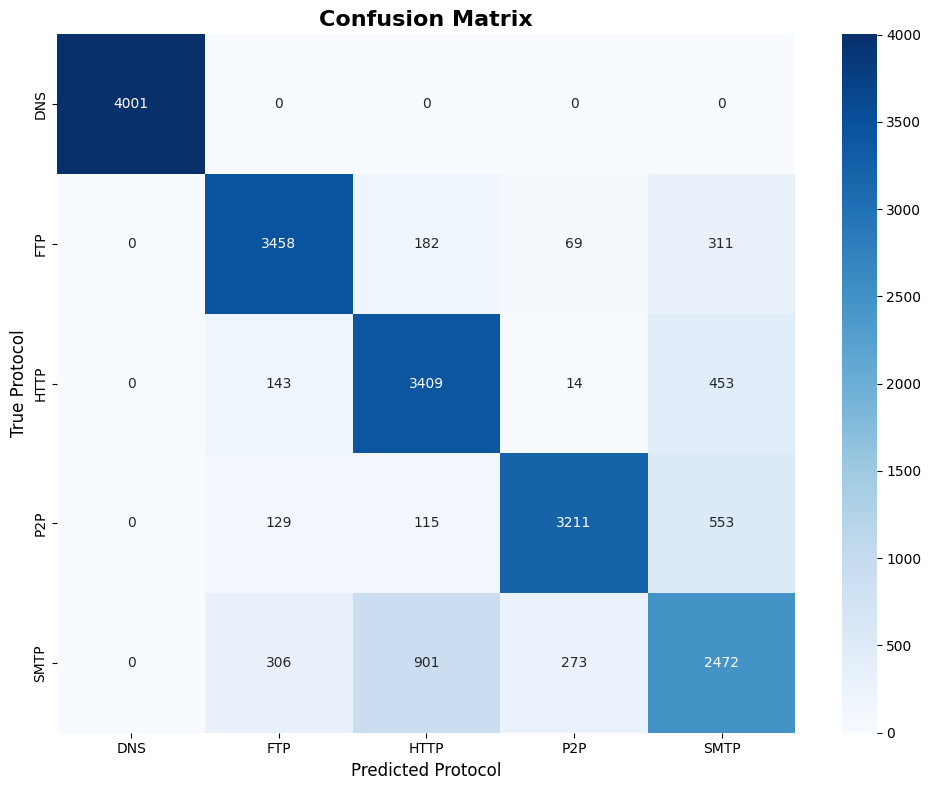

Confusion matrix saved

Feature Importance:
           feature  importance
3  avg_packet_size    0.312609
0         duration    0.248921
1      total_bytes    0.237452
2    total_packets    0.179171
5        byte_rate    0.018877
4      packet_rate    0.002969


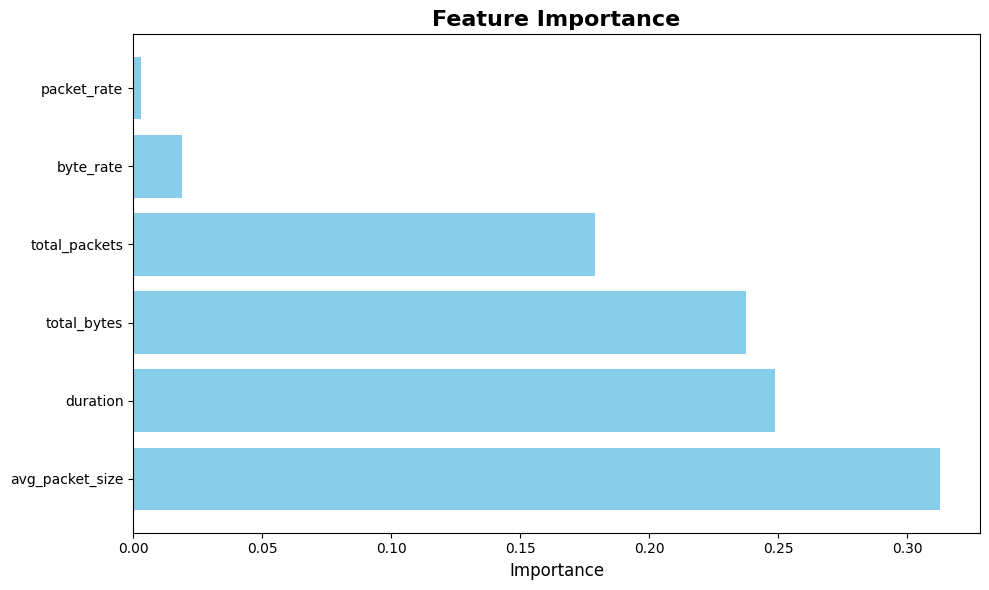

Feature importance saved


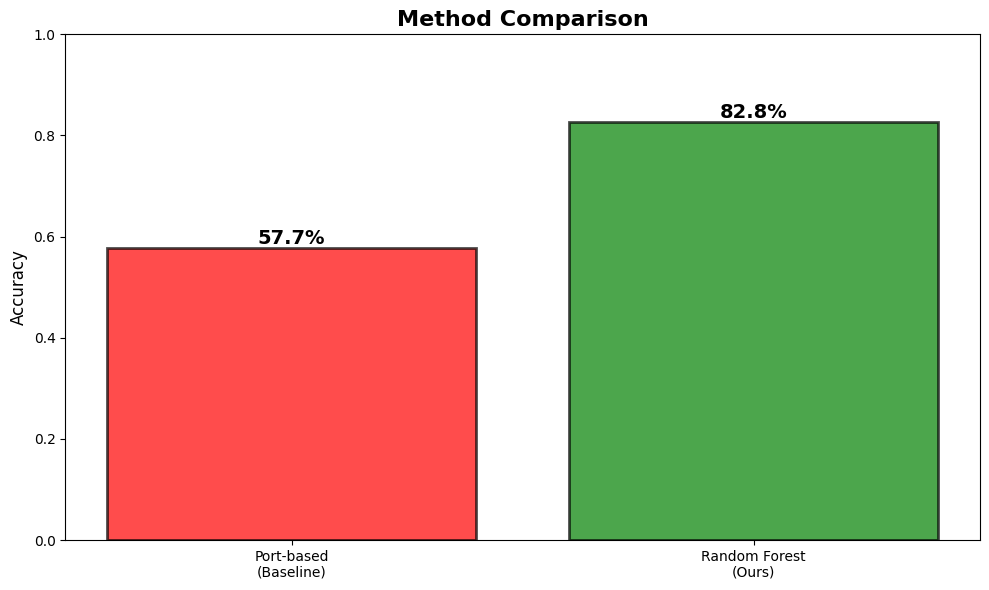

Method comparison saved

最终结果总结

方法1 - 基于端口的分类器:  57.7%
    特征: 仅使用dst_port（目标端口号）
    问题: 当协议使用非标准端口时准确率下降

方法2 - Random Forest分类器:  82.8%
    特征: 使用流量统计特征（不依赖端口号）
    优势: 对端口号的变化具有鲁棒性

相对提升:   43.3%


In [ ]:
print("\nStep 2: Loading data...")
df = pd.read_csv('traffic_data.csv')
print(f"Loaded {len(df)} traffic records")
print(f"Protocols: {df['protocol'].unique()}")

print("\nStep 3: Feature engineering...")

# 选择特征（不包括端口号！）
feature_cols = [
    'duration',
    'total_bytes',
    'total_packets',
    'avg_packet_size',
    'packet_rate',
    'byte_rate'
]

X = df[feature_cols].fillna(0)
y = df['protocol']

print(f"Feature matrix: {X.shape}")
print(f"Features used: {feature_cols}")

# 标签编码
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Protocol mapping:")
for i, protocol in enumerate(le.classes_):
    print(f"   {i} -> {protocol}")

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集/测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)
print(f"Train set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

import time
start = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start

print(f"Training completed in {train_time:.2f}s")

print("\nStep 4: Evaluation...")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"RESULTS")
print(f"Overall Accuracy: {accuracy*100:.2f}%\n")

print("Detailed Classification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=le.classes_,
    digits=3
))

print("\nStep 5: Generating visualizations...")

# 混淆矩阵
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
    cmap='Blues'
)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Protocol', fontsize=12)
plt.xlabel('Predicted Protocol', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("Confusion matrix saved")

# 特征重要性
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("Feature importance saved")

# 准确率对比图
plt.figure(figsize=(10, 6))
methods = ['Port-based\n(Baseline)', 'Random Forest\n(Ours)']
accuracies = [baseline_accuracy, accuracy]

bars = plt.bar(methods, accuracies, color=['red', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Method Comparison', fontsize=16, fontweight='bold')
plt.ylim([0, 1])

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{accuracies[i]*100:.1f}%',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('method_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("Method comparison saved")

print("\n" + "="*70)
print("最终结果总结")
print("="*70)

print(f"\n方法1 - 基于端口的分类器:  {baseline_accuracy*100:.1f}%")
print(f"    特征: 仅使用dst_port（目标端口号）")
print(f"    问题: 当协议使用非标准端口时准确率下降")

print(f"\n方法2 - Random Forest分类器:  {accuracy*100:.1f}%")
print(f"    特征: 使用流量统计特征（不依赖端口号）")
print(f"    优势: 对端口号的变化具有鲁棒性")

improvement = ((accuracy - baseline_accuracy) / baseline_accuracy) * 100
print(f"\n相对提升:   {improvement:.1f}%")


In [ ]:
import pickle

model_package = {
    'model': model,
    'scaler': scaler,
    'label_encoder': le,
    'feature_names': feature_cols,
    'accuracy': accuracy
}

with open('protocol_detector.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("Model saved: protocol_detector.pkl")
print(f"Model accuracy: {accuracy*100:.2f}%")
print(f"Features: {feature_cols}")

Model saved: protocol_detector.pkl
Model accuracy: 82.75%
Features: ['duration', 'total_bytes', 'total_packets', 'avg_packet_size', 'packet_rate', 'byte_rate']


In [ ]:
import pickle
import numpy as np
import pandas as pd

# 加载模型
with open('protocol_detector.pkl', 'rb') as f:
    model_package = pickle.load(f)

model = model_package['model']
scaler = model_package['scaler']
le = model_package['label_encoder']
feature_names = model_package['feature_names']

print("Model loaded successfully")
print(f"Model accuracy: {model_package['accuracy']*100:.2f}%")

# 测试样本
test_samples = [
    # HTTP流量特征
    {
        'duration': 5.0,
        'total_bytes': 50000,
        'total_packets': 80,
        'avg_packet_size': 800,
        'packet_rate': 15,
        'byte_rate': 8000
    },
    # P2P流量特征
    {
        'duration': 120.0,
        'total_bytes': 5000000,
        'total_packets': 5000,
        'avg_packet_size': 1000,
        'packet_rate': 40,
        'byte_rate': 40000
    },
    # DNS流量特征
    {
        'duration': 0.5,
        'total_bytes': 200,
        'total_packets': 2,
        'avg_packet_size': 100,
        'packet_rate': 4,
        'byte_rate': 400
    }
]

print("Testing model with sample data...")

for i, sample in enumerate(test_samples):
    # 提取特征
    features = np.array([[sample[f] for f in feature_names]])

    # 标准化
    features_scaled = scaler.transform(features)

    # 预测
    pred = model.predict(features_scaled)[0]
    prob = model.predict_proba(features_scaled)[0]

    protocol = le.inverse_transform([pred])[0]
    confidence = prob[pred]

    print(f"\nSample {i+1}:")
    print(f"  Features: {sample}")
    print(f"  Predicted Protocol: {protocol}")
    print(f"  Confidence: {confidence*100:.2f}%")
    print(f"  All probabilities:")
    for j, p in enumerate(prob):
        print(f"    {le.classes_[j]}: {p*100:.2f}%")

print("Testing complete!")

Model loaded successfully
Model accuracy: 82.75%
Testing model with sample data...

Sample 1:
  Features: {'duration': 5.0, 'total_bytes': 50000, 'total_packets': 80, 'avg_packet_size': 800, 'packet_rate': 15, 'byte_rate': 8000}
  Predicted Protocol: HTTP
  Confidence: 76.53%
  All probabilities:
    DNS: 0.00%
    FTP: 1.53%
    HTTP: 76.53%
    P2P: 1.88%
    SMTP: 20.05%

Sample 2:
  Features: {'duration': 120.0, 'total_bytes': 5000000, 'total_packets': 5000, 'avg_packet_size': 1000, 'packet_rate': 40, 'byte_rate': 40000}
  Predicted Protocol: P2P
  Confidence: 81.33%
  All probabilities:
    DNS: 0.00%
    FTP: 17.67%
    HTTP: 1.00%
    P2P: 81.33%
    SMTP: 0.00%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Sample 3:
  Features: {'duration': 0.5, 'total_bytes': 200, 'total_packets': 2, 'avg_packet_size': 100, 'packet_rate': 4, 'byte_rate': 400}
  Predicted Protocol: DNS
  Confidence: 100.00%
  All probabilities:
    DNS: 100.00%
    FTP: 0.00%
    HTTP: 0.00%
    P2P: 0.00%
    SMTP: 0.00%
Testing complete!


In [ ]:
from google.colab import files

files.download('traffic_data.csv')
files.download('protocol_detector.pkl')
files.download('confusion_matrix.png')
files.download('feature_importance.png')
files.download('method_comparison.png')

print("All files downloaded!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All files downloaded!
